In [28]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import sys, os
sys.path.append(os.getcwd())
from Script.DP import DataPreprocessor
from Script.LR import LogisticRegressionModel
from Script.SVM import SVMModel
from Script.RF import RandomForestModel
from Script.XGB import XGBoostModel
from Script.ModelSelector import ModelSelector
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from pathlib import Path

project_root = str(Path(__file__).parent.parent.absolute())
if project_root not in sys.path:
	sys.path.insert(0, project_root)

**Biểu đồ phân tích dữ liệu trước khi xử lý**

In [29]:
df = pd.read_csv('Data/heart_disease_uci.csv')
df.drop(columns=['id'], inplace=True)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


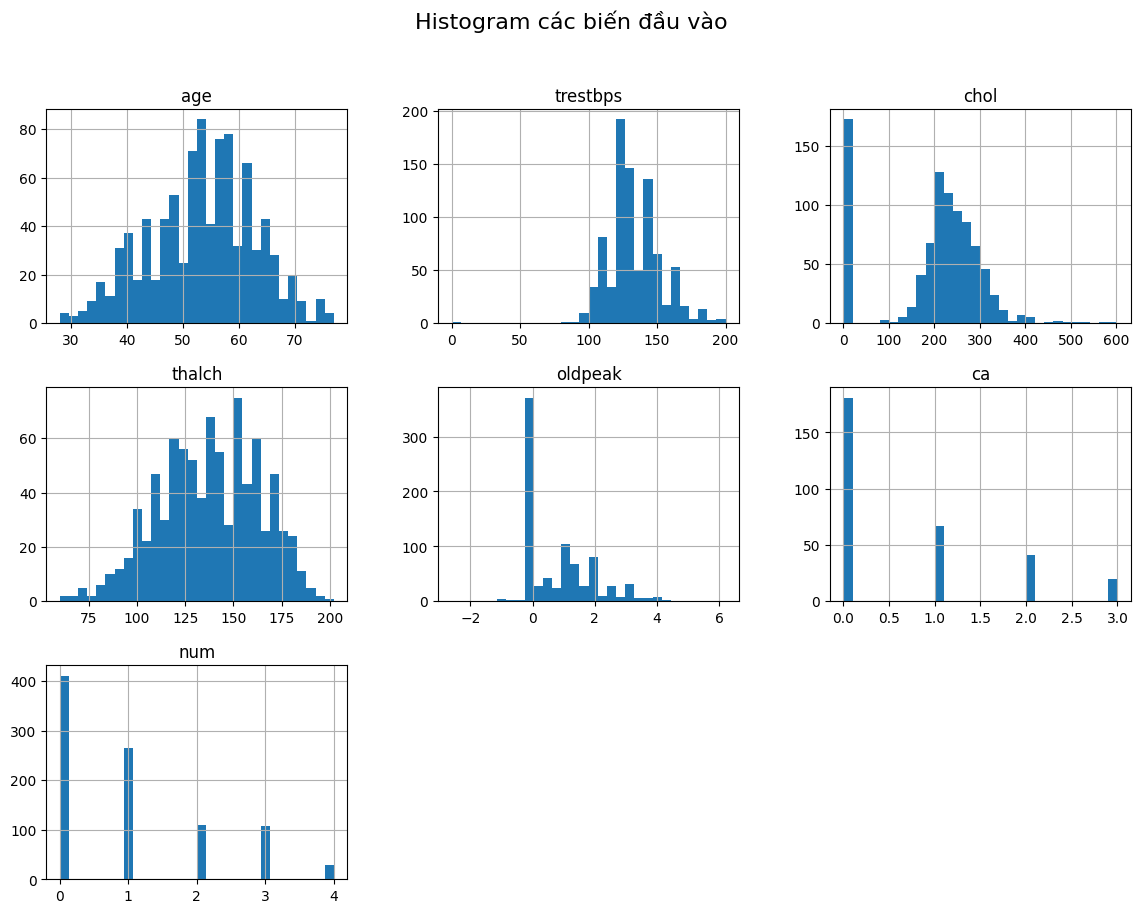

In [30]:
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Histogram các biến đầu vào", fontsize=16)
plt.show()

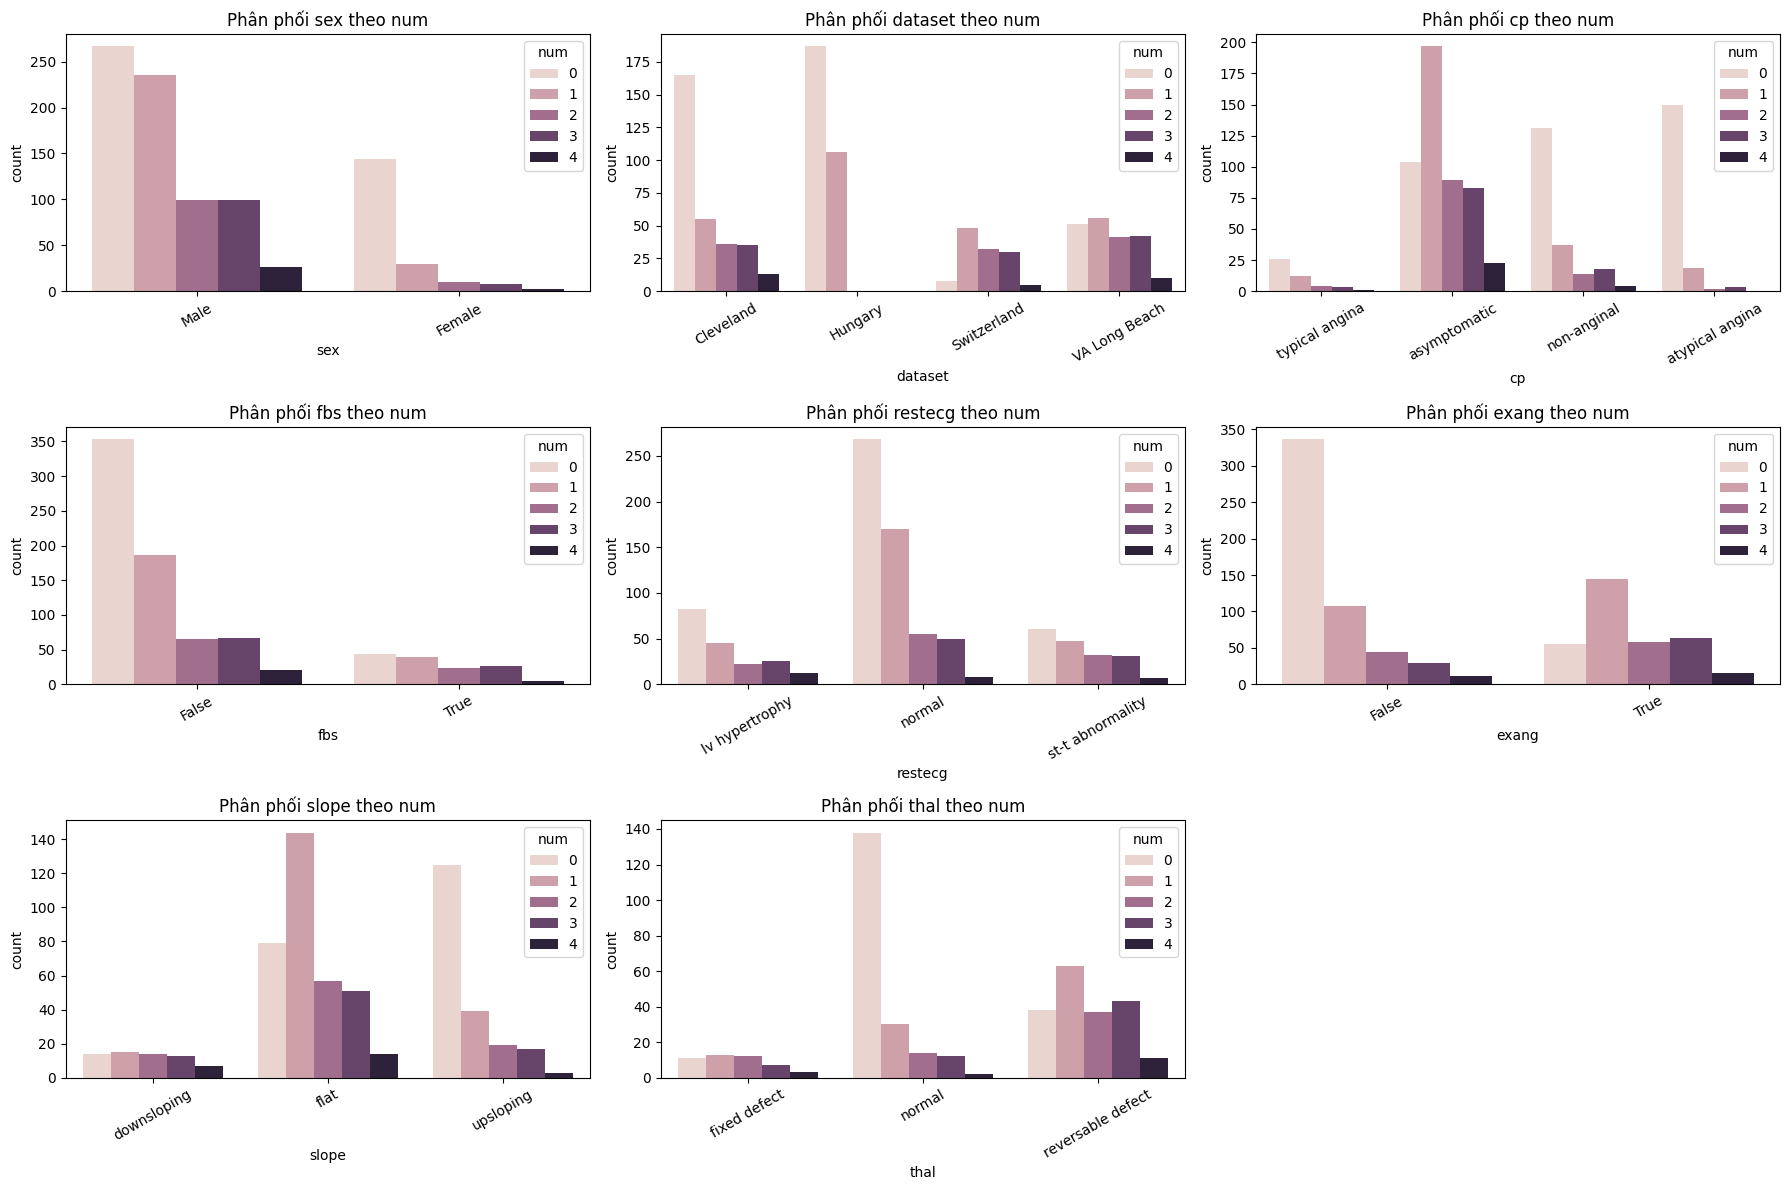

In [31]:
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

n = len(cat_features)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(cat_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='num')
    plt.title(f"Phân phối {col} theo num")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

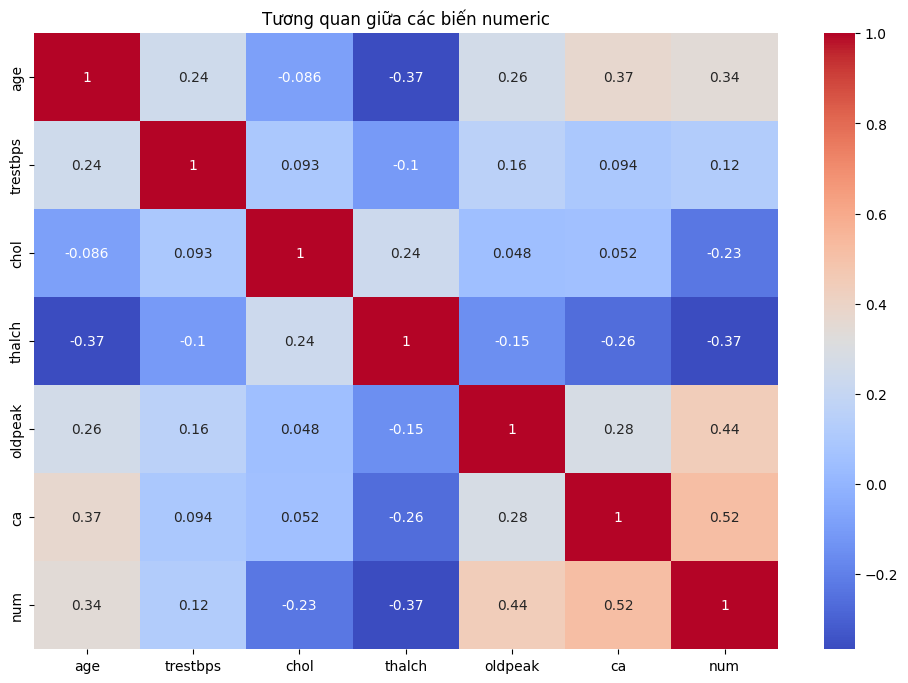

In [32]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Tương quan giữa các biến numeric")
plt.show()

In [33]:
processed_df = None
preprocessor = None

print("TIỀN XỬ LÍ DỮ LIỆU - HEART DISEASE DATASET")
print("=" * 70)

# Xử lí dữ liệu
try:
    input_file = "Data/heart_disease_uci.csv"
    # Khởi tạo và xử lý dữ liệu
    preprocessor_obj = DataPreprocessor(target_column='num', random_state=42)
    preprocessor_obj.load_data(input_file)
    processed_data = preprocessor_obj.auto_process_by_data_types()
    preprocessor_obj.save_processed_data('heart_disease_processed.csv')

    globals()['processed_df'] = processed_data
    globals()['preprocessor'] = preprocessor_obj
except Exception as e:
    print(f"\nLỗi: {e}")
    import traceback
    traceback.print_exc()
    sys.exit(1)

2025-12-09 19:04:12,628 - INFO - Đã xóa cột 'id'
2025-12-09 19:04:12,632 - INFO - Phát hiện - Numeric: 6, Categorical: 8, Datetime: 0
2025-12-09 19:04:12,633 - INFO - Đã load dữ liệu thành công: (920, 15)
2025-12-09 19:04:12,633 - INFO - Bắt đầu auto preprocessing pipeline...
2025-12-09 19:04:12,633 - INFO - Bắt đầu xử lí missing values...
2025-12-09 19:04:12,676 - INFO - Hoàn tất xử lí missing. Còn lại: 0
2025-12-09 19:04:12,724 - INFO - Tìm thấy 230 outliers
2025-12-09 19:04:12,724 - INFO - Bắt đầu quy trình phát hiện và xử lí outliers cho 6 cột số.
2025-12-09 19:04:12,766 - INFO - Hoàn tất phát hiện. Tìm thấy tổng cộng 230 outliers trong 5 cột.
2025-12-09 19:04:12,771 - INFO - Hoàn tất xử lí outliers tổng thể.
2025-12-09 19:04:12,771 - INFO - Label Encoding: 'sex' (2 values)
2025-12-09 19:04:12,773 - INFO - OneHot Encoding: 'dataset' (4 values -> 3 cols)
2025-12-09 19:04:12,774 - INFO - OneHot Encoding: 'cp' (4 values -> 3 cols)
2025-12-09 19:04:12,775 - INFO - Label Encoding: 'fbs'

TIỀN XỬ LÍ DỮ LIỆU - HEART DISEASE DATASET


In [34]:
# Giả sử df đã chuẩn hóa và target là cột "num"
X = processed_data.drop(columns=["num"])
y = (processed_data["num"] > 0).astype(int)

# Danh sách các model
models = [
    LogisticRegressionModel(X=X, y=y, C=1.0, penalty="l2", max_iter=1000),
    SVMModel(X=X, y=y, C=1.0, kernel="rbf", probability=True),
    RandomForestModel(X=X, y=y, n_estimators=100, max_depth=None),
    XGBoostModel(X=X, y=y, n_estimators=100, learning_rate=0.1, max_depth=6)
]

# Các siêu tham số muốn tối ưu cho mỗi model (nếu muốn)
param_grids = {
    "LogisticRegression": {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"], "max_iter":[500,1000]},
    "SVM": {"C": [0.1, 1, 10], "gamma": ["scale","auto"], "kernel": ["rbf"]},
    "RandomForest": {"n_estimators": [50,100,200], "max_depth": [None,5,10]},
    "XGBoost": {"n_estimators": [50,100,200], "learning_rate": [0.01,0.1,0.2], "max_depth":[3,6,9]}
}
save_folder = "models_all/"
# Fit, optimize, Save và đánh giá từng model
for model in models:
    print(f"--- {model.name} ---")
    path = f"{save_folder}{model.get_name()}.pkl"

    model.split_data()
    # Tối ưu siêu tham số nếu có param_grid
    if model.name in param_grids:
        print("Optimizing hyperparameters...")
        best = model.optimize_params(
            param_grid=param_grids[model.name],
            search="grid",
            cv=3,
            scoring="recall",   # ưu tiên recall cho bệnh tim
            n_jobs=-1,
            verbose=1
        )

    # Fit model (sẽ dùng _model đã tối ưu)
    model.fit()

    # Lưu model
    model.save_model(path)

    # Đánh giá metrics trên tập validation/test
    metric = model.evaluate()
    cv_score = model.cross_validate(cv=5)

    print("Metrics:")
    for k, v in metric.items():
        print("\t", k, ":", v)

    print("CV scores:")
    for k, v in cv_score.items():
        print("\t", k, ":", v)

    model.print_summary()
    print("\n\n")

--- LogisticRegression ---
Optimizing hyperparameters...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Metrics:
	 accuracy : 0.8152173913043478
	 precision : 0.8355263157894737
	 recall : 0.8300653594771242
	 f1 : 0.8327868852459016
	 roc_auc : 0.9006323396567298
CV scores:
	 cv_scores : [0.8260869565217391, 0.657608695652174, 0.907608695652174, 0.8695652173913043, 0.657608695652174]
	 cv_mean : 0.783695652173913
	 cv_std : 0.10613283042377517
Các thông tin về mô hình
name : LogisticRegression
is_fitted : True
model_params :
	 C : 0.01
	 class_weight : None
	 dual : False
	 fit_intercept : True
	 intercept_scaling : 1
	 l1_ratio : None
	 max_iter : 500
	 multi_class : deprecated
	 n_jobs : None
	 penalty : l2
	 random_state : 42
	 solver : lbfgs
	 tol : 0.0001
	 verbose : 0
	 warm_start : False
created_at : 2025-12-09 19:04:12.810308
trained_at : 2025-12-09 19:04:12.865468
best_params : {'C': 0.01, 'max_iter': 500, 'penalty': 'l2'}
best_score : 0.8903764895788825



--- S

In [35]:
# load mô hình
loaded_models = {}
for model in models:
    path = f"{save_folder}{model.get_name()}.pkl"
    loaded_model = type(model).load_model(path)  # tạo instance mới từ class của model gốc
    loaded_models[model.get_name()] = loaded_model
    print(f"Loaded {model.get_name()} from {path}")


Loaded LogisticRegression from models_all/LogisticRegression.pkl
Loaded SVM from models_all/SVM.pkl
Loaded RandomForest from models_all/RandomForest.pkl
Loaded XGBoost from models_all/XGBoost.pkl


In [36]:
# lập metric để so sánh với trường hợp không tối ưu siêu tham số

# model_not_optimal là models ở cell trên
models_not_optimal = [
    LogisticRegressionModel(X=X, y=y, C=1.0, penalty="l2", max_iter=1000),
    SVMModel(X=X, y=y, C=1.0, kernel="rbf", probability=True),
    RandomForestModel(X=X, y=y, n_estimators=100, max_depth=None),
    XGBoostModel(X=X, y=y, n_estimators=100, learning_rate=0.1, max_depth=6)
]

all_model_metrics = {}

for model in models_not_optimal:
    name = model.get_name()

    # Các random state đều bằng 42 nên sẽ không gây ra sai lệch do ngẫu nhiên
    model.fit()
    metric_not_optimal = model.evaluate()

    # Random state bằng 42 nên sẽ không ảnh hưởng
    loaded_models[name].split_data(X= X, y = y)
    metric_optimal = loaded_models[name].evaluate()

    all_model_metrics[name] = {
        "Trước Khi tối ưu siêu tham số": metric_not_optimal,
        "Sau khi tối ưu siêu tham số": metric_optimal
    }


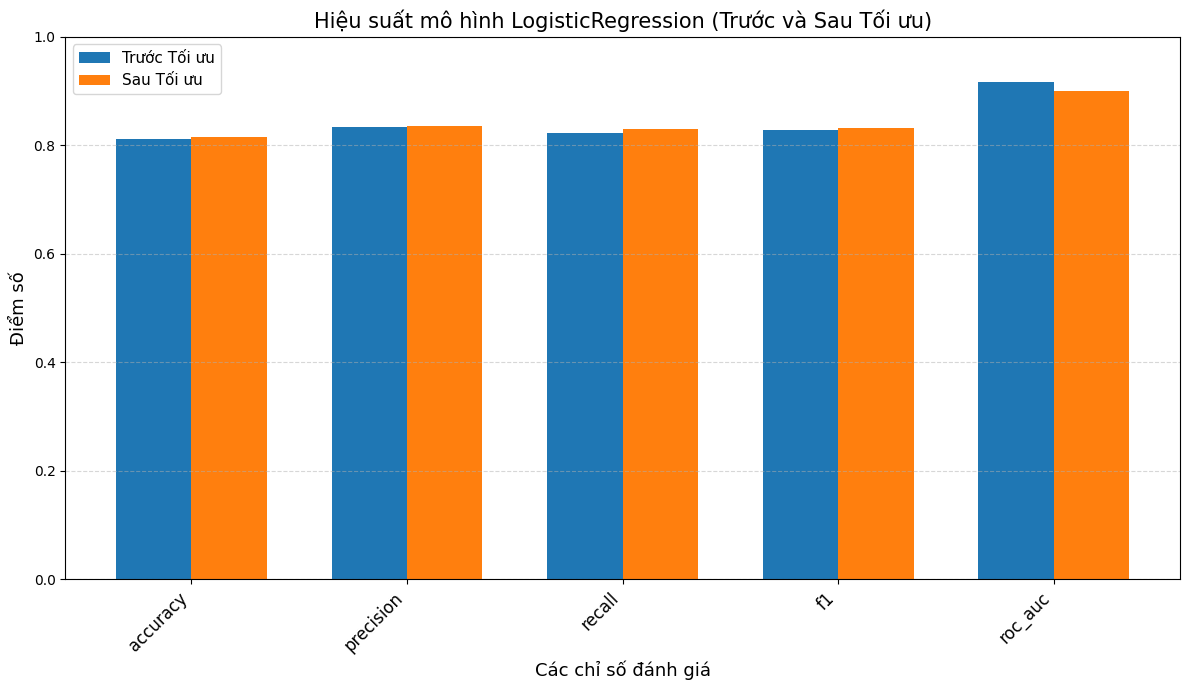

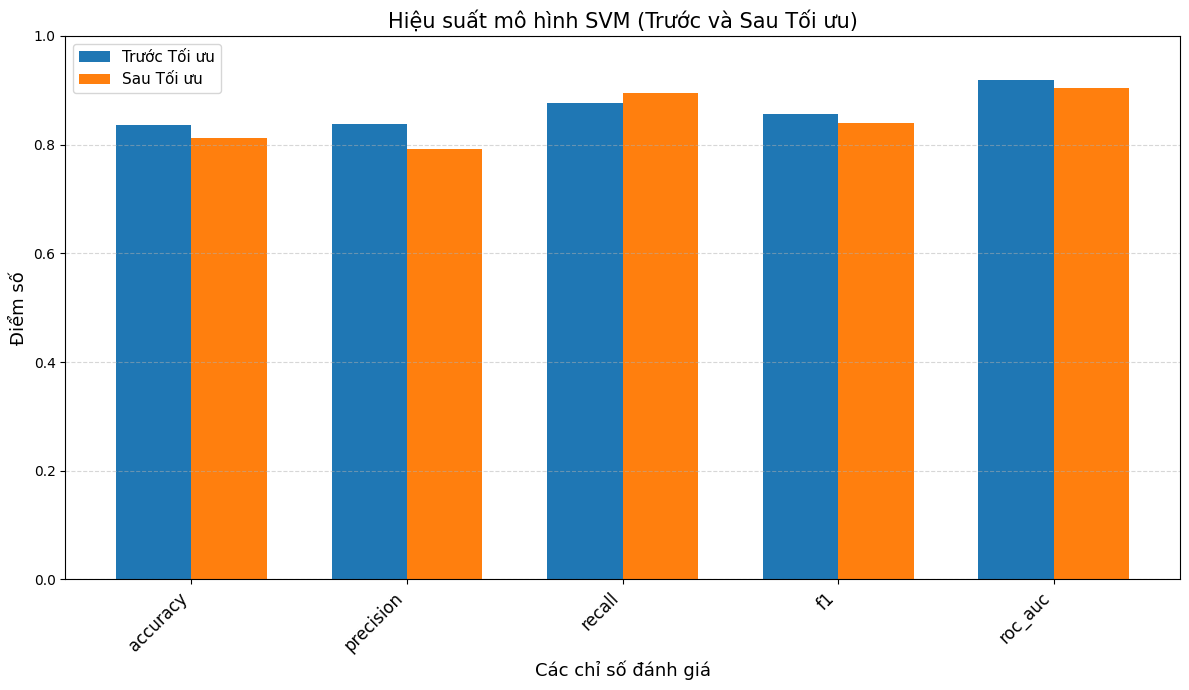

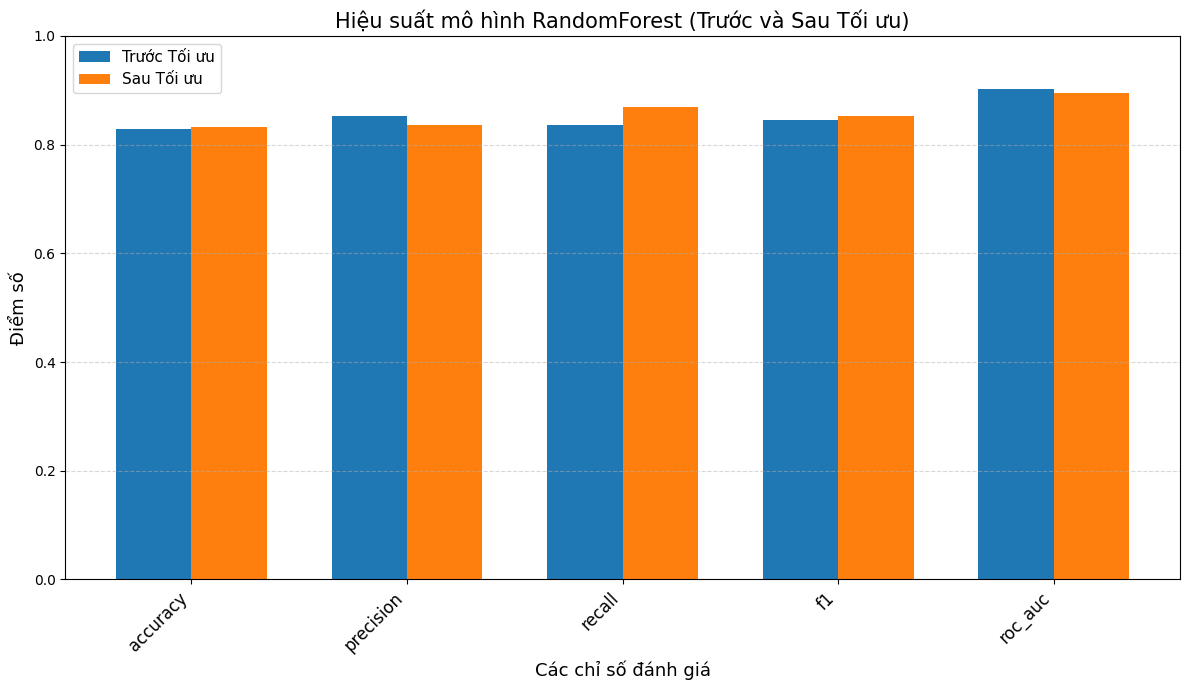

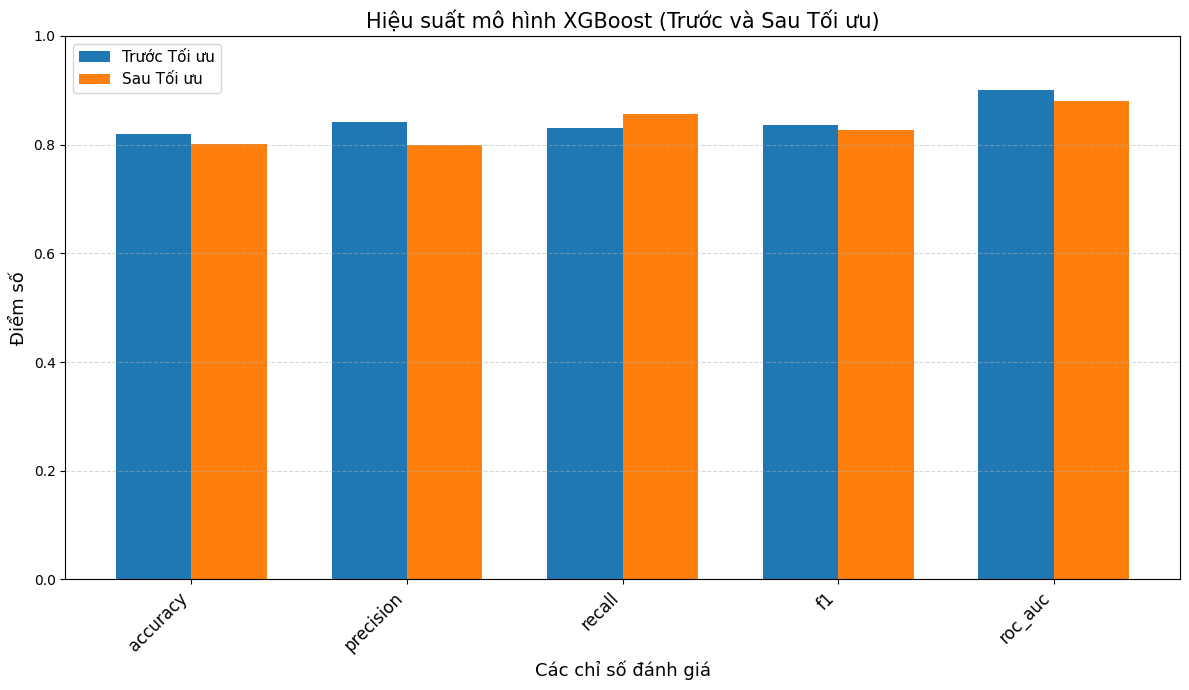

In [37]:
for model_name, metrics_data in all_model_metrics.items():
    metric_before = metrics_data['Trước Khi tối ưu siêu tham số']
    metric_after = metrics_data['Sau khi tối ưu siêu tham số']

    metrics = list(metric_before.keys())
    before_values = list(metric_before.values())
    after_values = list(metric_after.values())

    x = np.arange(len(metrics))
    width = 0.35

    plt.figure(figsize=(12, 7))
    plt.bar(x - width/2, before_values, width, label="Trước Tối ưu")
    plt.bar(x + width/2, after_values, width, label="Sau Tối ưu")

    plt.xticks(x, metrics, fontsize=12, rotation=45, ha='right')
    plt.xlabel("Các chỉ số đánh giá", fontsize=13)
    plt.ylabel("Điểm số", fontsize=13)

    plt.title(f"Hiệu suất mô hình {model_name} (Trước và Sau Tối ưu)", fontsize=15) # Tiêu đề

    plt.legend(fontsize=11)
    plt.ylim(0, 1)  # vì metrics từ 0 → 1

    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout() # Điều chỉnh layout để tránh cắt xén nhãn
    plt.show()

In [38]:
test = ModelSelector(models=models, metric='recall') #Sử dụng recall để chuẩn đoán đúng nhiều người có bệnh nhất và đồng thời tránh bỏ sót người bệnh
test.print_result()

# Sử dụng khi cần lấy model tốt nhất
best_model = test.get_best_model()[0]["model"]
best_model

Metric được chọn: recall
tên mô hình: SVM .
 Chỉ số:  0.8954248366013072
tên mô hình: RandomForest .
 Chỉ số:  0.869281045751634
tên mô hình: XGBoost .
 Chỉ số:  0.8562091503267973
tên mô hình: LogisticRegression .
 Chỉ số:  0.8300653594771242
Mô hình tốt nhất là: 
  SVM => 0.8954248366013072


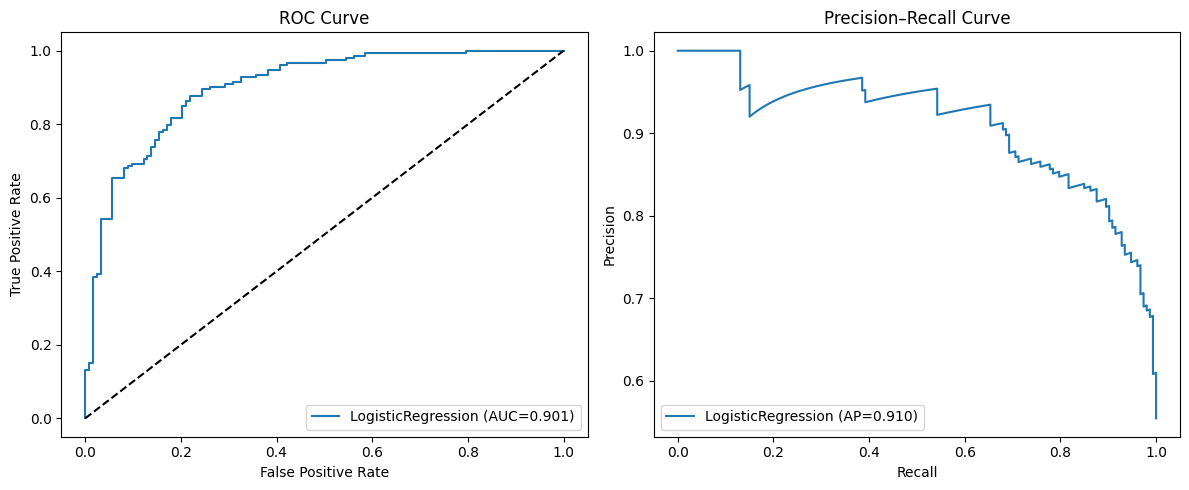

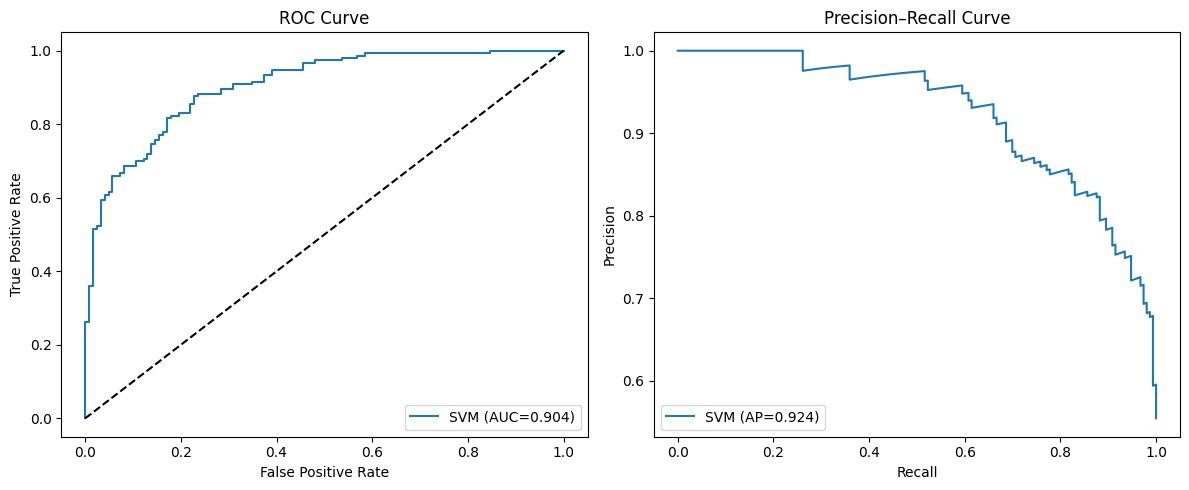

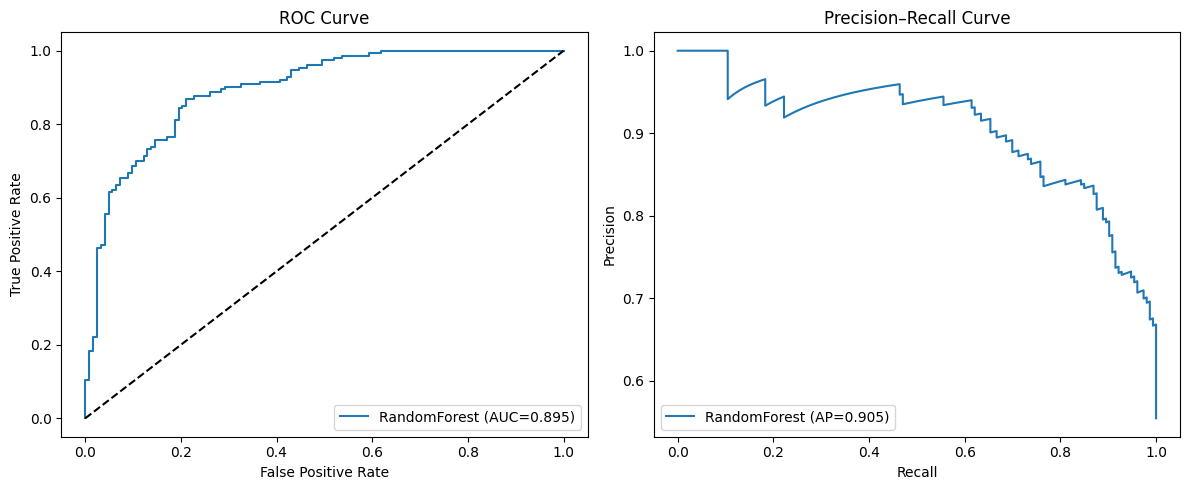

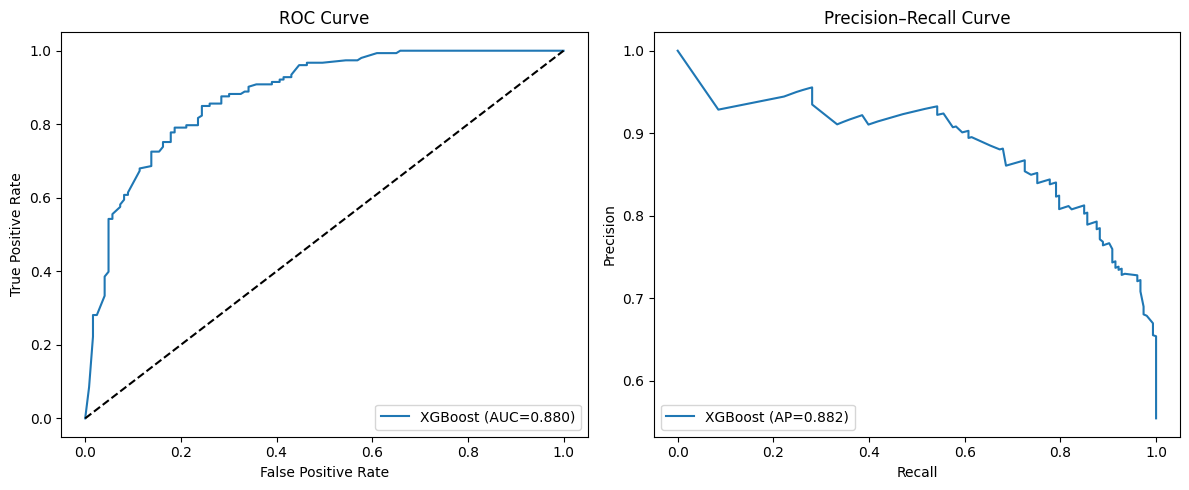

In [39]:
for i in range(4):
    models[i].plot_roc_pr()

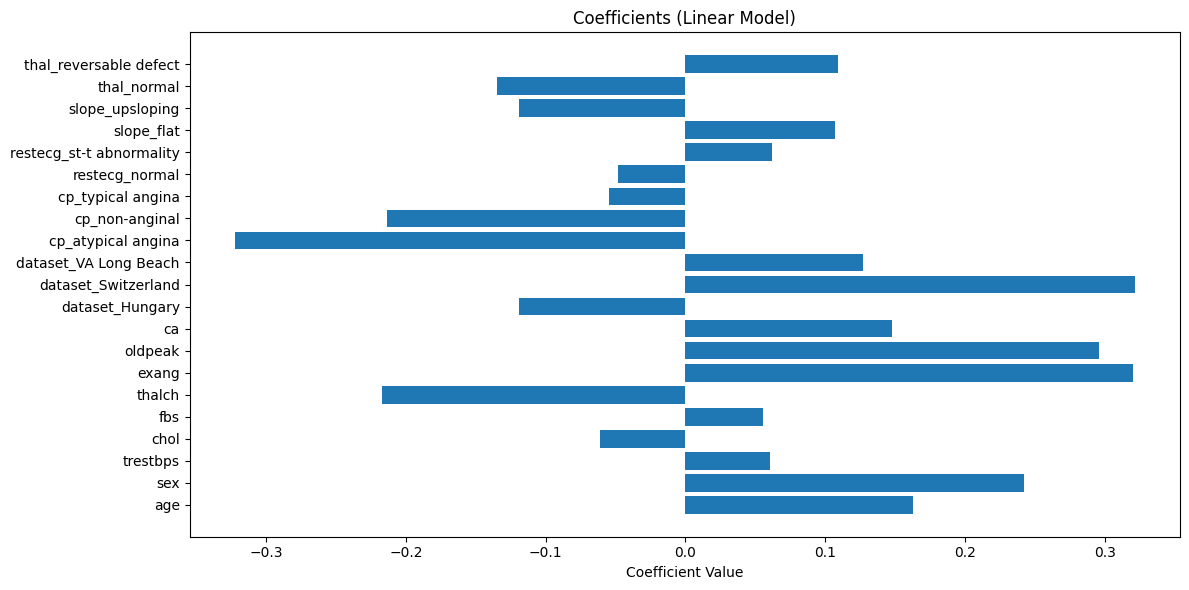

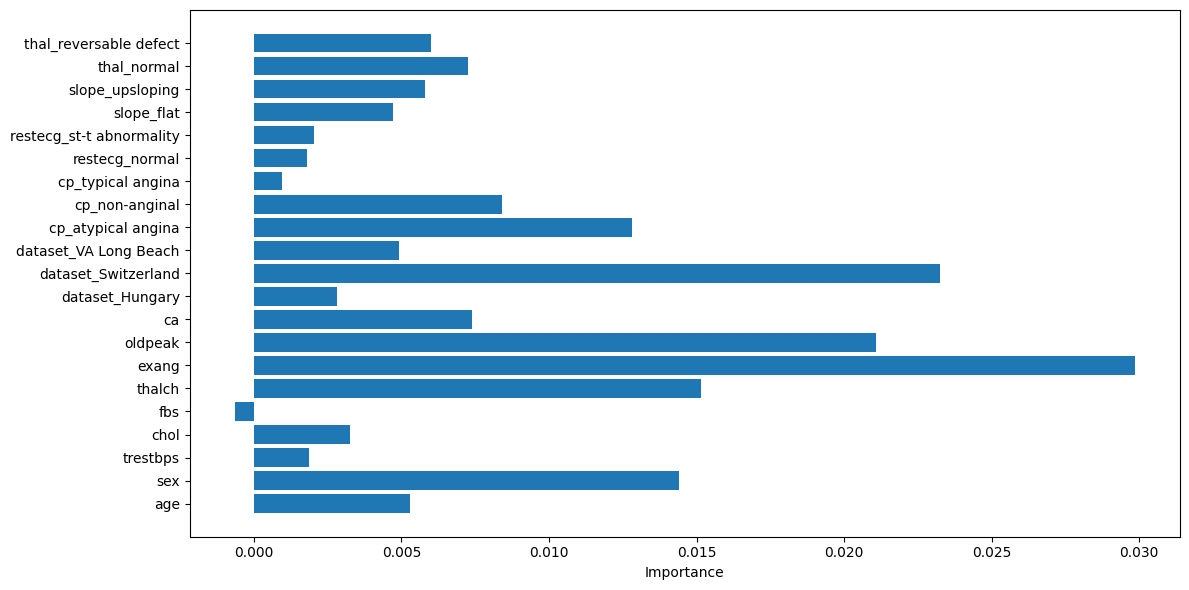

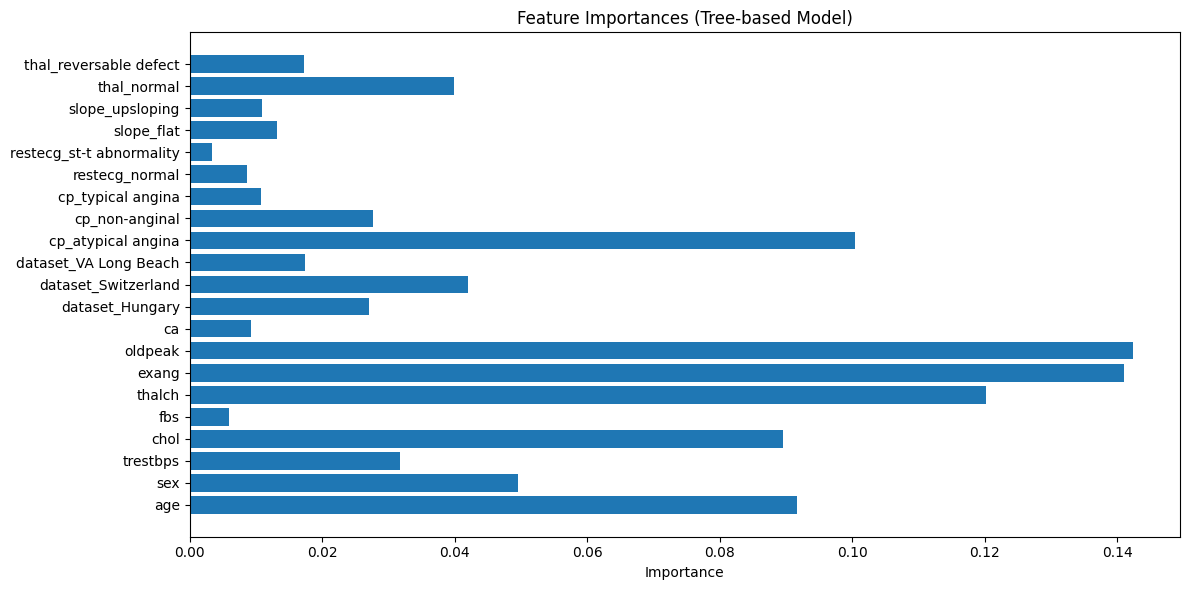

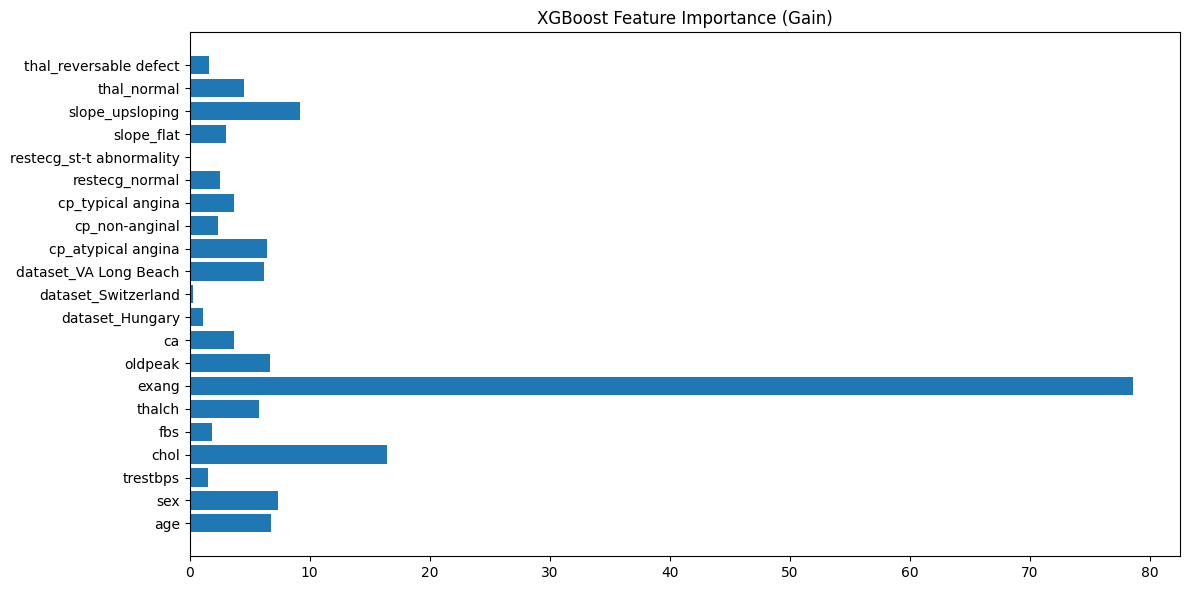

In [40]:
for i in range(4):
    models[i].plot_feature_importance()

In [42]:
patient_info = [37, "Male", "Cleveland", "non-anginal", 130.0, 250.0, False, "normal", 187.0, False, 3.5, "downsloping", 0.0, "normal", 0]

patient_info_df = preprocessor.preprocess_new_patient(
                new_patient_data=patient_info,
                processed_df=processed_data
            )

# Giả sử best_model là model đã huấn luyện
prediction = best_model.predict(patient_info_df)[0]  # Lấy giá trị đầu tiên
proba = best_model.predict_proba(patient_info_df)[0]  # Lấy mảng xác suất đầu tiên

# Nếu y_bin = 0/1 với 1 = có bệnh, 0 = không bệnh
labels = {0: "Không bệnh", 1: "Có bệnh"}

print(f"Dự đoán: {labels[prediction]}")
print(f"Xác suất dự đoán: Không bệnh = {proba[0]:.2f}, Có bệnh = {proba[1]:.2f}")

2025-12-09 19:04:42,996 - INFO - Bắt đầu preprocess bệnh nhân mới: (1, 15)
2025-12-09 19:04:43,003 - INFO - Label encoded 'sex'
2025-12-09 19:04:43,006 - INFO - OneHot encoded 'dataset'
2025-12-09 19:04:43,009 - INFO - OneHot encoded 'cp'
2025-12-09 19:04:43,010 - INFO - Label encoded 'fbs'
2025-12-09 19:04:43,013 - INFO - OneHot encoded 'restecg'
2025-12-09 19:04:43,013 - INFO - Label encoded 'exang'
2025-12-09 19:04:43,015 - INFO - OneHot encoded 'slope'
2025-12-09 19:04:43,016 - INFO - OneHot encoded 'thal'
2025-12-09 19:04:43,018 - INFO - Scaled 'age'
2025-12-09 19:04:43,019 - INFO - Scaled 'sex'
2025-12-09 19:04:43,020 - INFO - Scaled 'trestbps'
2025-12-09 19:04:43,022 - INFO - Scaled 'chol'
2025-12-09 19:04:43,024 - INFO - Scaled 'fbs'
2025-12-09 19:04:43,025 - INFO - Scaled 'thalch'
2025-12-09 19:04:43,026 - INFO - Scaled 'exang'
2025-12-09 19:04:43,027 - INFO - Scaled 'oldpeak'
2025-12-09 19:04:43,028 - INFO - Scaled 'ca'
2025-12-09 19:04:43,029 - INFO - Scaled 'dataset_Hungary

Dự đoán: Không bệnh
Xác suất dự đoán: Không bệnh = 0.69, Có bệnh = 0.31
